In [1]:
# Author       : AKASH DIXIT
# E-Mail       : akashdixit453@gmail.com
# Contact      : +91-7415770162
# Designation  : Robotics Engineer
# Decision Tree for Financial Loam EMI default detection
# Data : bank.csv

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import datasets
from io import StringIO
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
%matplotlib inline

In [3]:
#Load the dataset
data = pd.read_csv('bank.csv')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
#check if the data set contains any null value
data[data.isnull().any(axis=1)].count()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [5]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


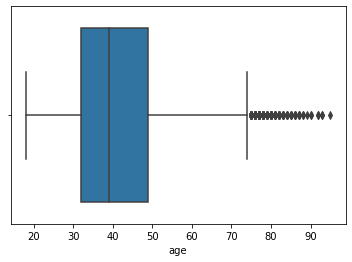

In [6]:
#Box plot of 'age'
g = sns.boxplot(data['age'])

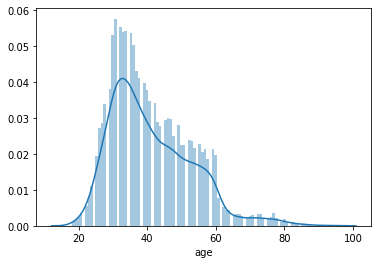

In [7]:
#Distribution plot of 'age'
sns.distplot(data['age'], bins=100)

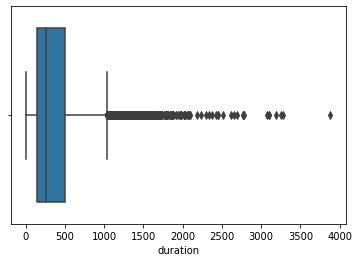

In [8]:
#Box plot of 'duration'
g = sns.boxplot(data['duration'])

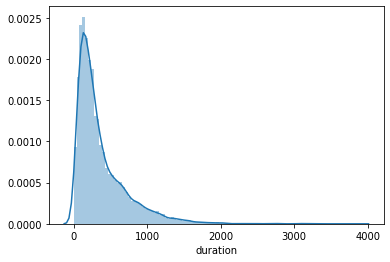

In [9]:
#Distribution plot of 'duration'
sns.distplot(data['duration'], bins = 100)

convert categorical data

In [10]:
#Make a copy of data
data = data.copy()

In [11]:
#Different types of job categories and their counts
data.job.value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

In [12]:
#Explore People who made a deposit Vs Job category
jobs = ['management','blue-collar','technician','admin','services',
       'retired','self-employed','student','unemployed','entrepreneur',
       'housemaid','unknown']

for j in jobs:
    print("{:15} : {:5}". format(j, len(data[(data.deposit == "yes") & (data.job ==j)])))

management      :  1301
blue-collar     :   708
technician      :   840
admin           :     0
services        :   369
retired         :   516
self-employed   :   187
student         :   269
unemployed      :   202
entrepreneur    :   123
housemaid       :   109
unknown         :    34


In [13]:
#combine similar jobs into categiroes
data['job'] = data['job'].replace(['management','admin'],'white-collar')
data['job'] = data['job'].replace(['services','housemaid'],'pink-collar')
data['job'] = data['job'].replace(['retired','student','unemployed',
                                  'unknown'],'other')

In [14]:
#New Value counts
data.job.value_counts()

white-collar     2566
blue-collar      1944
technician       1823
other            1565
admin.           1334
pink-collar      1197
self-employed     405
entrepreneur      328
Name: job, dtype: int64

In [15]:
# Combine 'unknown' and 'other' as 'other' isn't really match with either 'success' or 'failure'
data['poutcome'] = data['poutcome'].replace(['other'],'unknown')

data.poutcome.value_counts()

unknown    8863
failure    1228
success    1071
Name: poutcome, dtype: int64

-----contact----

In [16]:
# Drop 'contact', as every participant has been contacted.
data.drop('contact', axis = 1, inplace= True)

------default------

In [17]:
#values for "default" :yes/no
data['default']
data['default_cat'] = data['default'].map({'yes':1 , 'no':0})
data.drop('default', axis=1,inplace = True)

------housing------

In [18]:
#values for "housing": yes/no
data['housing_cat'] = data['housing'].map({'yes':1, 'no':0})
data.drop('housing', axis=1, inplace = True)

-------loan-------

In [19]:
#values for "loan": yes/no
data['loan_cat'] = data['loan'].map({'yes':1, 'no':0})
data.drop('loan', axis=1, inplace = True)

--------motth,day-------

In [20]:
#day: last contact day of the month
#moth: last contact month of the year
#Drop 'month' and 'day' as they don't have any intrinsic meaning

data.drop('month', axis=1, inplace = True)
data.drop('day', axis=1, inplace = True)

-------deposit------

In [21]:
#values for "deposit" : yes/no
data["deposit_cat"] = data['deposit'].map({'yes':1, 'no':0})
data.drop('deposit', axis=1, inplace =True)

----------pdays-------

In [22]:
# pdays: number of days that passed by after the client was last contacted from a previous campaign
# -1 means client was not previously contacted

print("Customers that have not been contacted before:", len(data[data.pdays==-1]))
print("Maximum values on pdays:", data['pdays'].max())

Customers that have not been contacted before: 8324
Maximum values on pdays: 854


In [23]:
# Map padys=-1 into a large value (10000 is used) to indicate that it is so far in the past that it has no effect
data.loc[data['pdays']==-1, 'pdays'] = 10000

In [34]:
#create a new column : recent_pdays
data['recent_pdays'] = np.where(data['pdays'],1/data.pdays,1/data.pdays)
print(data['recent_pdays'])

#Drop 'pdays'
data.drop('pdays', axis=1, inplace = True)

0        0.000100
1        0.000100
2        0.000100
3        0.000100
4        0.000100
           ...   
11157    0.000100
11158    0.000100
11159    0.000100
11160    0.005814
11161    0.000100
Name: recent_pdays, Length: 11162, dtype: float64


In [24]:
data.tail()

,age,job,marital,education,balance,duration,campaign,pdays,previous,poutcome,default_cat,housing_cat,loan_cat,deposit_cat
11157,33,blue-collar,single,primary,1,257,1,10000,0,unknown,0,1,0,0
11158,39,pink-collar,married,secondary,733,83,4,10000,0,unknown,0,0,0,0
11159,32,technician,single,secondary,29,156,2,10000,0,unknown,0,0,0,0
11160,43,technician,married,secondary,0,9,2,172,5,failure,0,0,1,0
11161,34,technician,married,secondary,0,628,1,10000,0,unknown,0,0,0,0


--------convert to dummy values--------

In [25]:
# Convert categorical variables to dummies
data_with_dummies = pd.get_dummies(data=data, columns=['job','marital','education',
                                                      'poutcome'],
                                  prefix=['job','marital','education','poutcome'])

data_with_dummies.head()

,age,balance,duration,campaign,pdays,previous,default_cat,housing_cat,loan_cat,deposit_cat,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
0,59,2343,1042,1,10000,0,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1
1,56,45,1467,1,10000,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,1
2,41,1270,1389,1,10000,0,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1
3,55,2476,579,1,10000,0,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1
4,54,184,673,2,10000,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1


In [26]:
data_with_dummies.describe()

,age,balance,duration,campaign,pdays,previous,default_cat,housing_cat,loan_cat,deposit_cat,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,...,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,371.993818,2.508421,7509.521054,0.832557,0.015051,0.473123,0.130801,0.473840,...,0.115839,0.568984,0.315176,0.134385,0.490593,0.330496,0.044526,0.110016,0.095951,0.794033
std,11.913369,3225.413326,347.128386,2.722077,4265.868523,2.292007,0.121761,0.499299,0.337198,0.499338,...,0.320047,0.495241,0.464607,0.341080,0.499934,0.470413,0.206270,0.312924,0.294537,0.404424
min,18.000000,-6847.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,122.000000,138.000000,1.000000,521.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,39.000000,550.000000,255.000000,2.000000,10000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,49.000000,1708.000000,496.000000,3.000000,10000.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,95.000000,81204.000000,3881.000000,63.000000,10000.000000,58.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


-----------observation on whole population--------

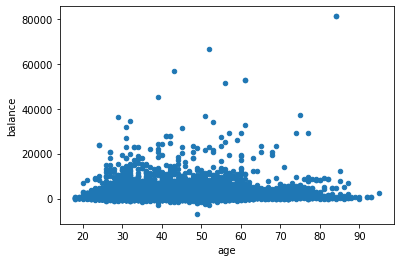

In [27]:
#Scatterplot showing age and balance
data_with_dummies.plot(kind='scatter', x='age', y='balance')

#Across all ages, majority of peoples have savings of less than 20000

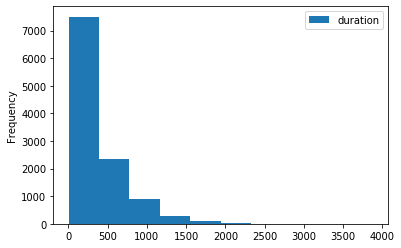

In [28]:
data_with_dummies.plot(kind='hist', x='poutcome_success', y='duration')

Analysis of people who signs up fro a term deposit

In [29]:
#People who sign up to a term deposit
data_with_dummies[data.deposit_cat==1].describe()

,age,balance,duration,campaign,pdays,previous,default_cat,housing_cat,loan_cat,deposit_cat,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
count,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.0,...,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000
mean,41.670070,1804.267915,537.294574,2.141047,6467.527699,1.170354,0.009832,0.365854,0.091511,1.0,...,0.117603,0.520892,0.361505,0.111741,0.463226,0.377387,0.047646,0.116846,0.184912,0.698242
std,13.497781,3501.104777,392.525262,1.921826,4709.136115,2.553272,0.098676,0.481714,0.288361,0.0,...,0.322167,0.499611,0.480482,0.315078,0.498693,0.484779,0.213036,0.321267,0.388263,0.459064
min,18.000000,-3058.000000,8.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,210.000000,244.000000,1.000000,195.000000,0.000000,0.000000,0.000000,0.000000,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,733.000000,426.000000,2.000000,10000.000000,0.000000,0.000000,0.000000,0.000000,1.0,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,50.000000,2159.000000,725.000000,3.000000,10000.000000,1.000000,0.000000,1.000000,0.000000,1.0,...,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,95.000000,81204.000000,3881.000000,32.000000,10000.000000,58.000000,1.000000,1.000000,1.000000,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
#People signed up to a term deposit having a personal loan (loan_cat) and housing loan(housing_cat)
len(data_with_dummies[(data_with_dummies.deposit_cat == 1) & (data_with_dummies.loan_cat) & (data_with_dummies.housing_cat)])

265

In [31]:
#People Signed up to a term deposit with a credit default
len(data_with_dummies[(data_with_dummies.deposit_cat == 1) & (data_with_dummies.default_cat==1)])

52

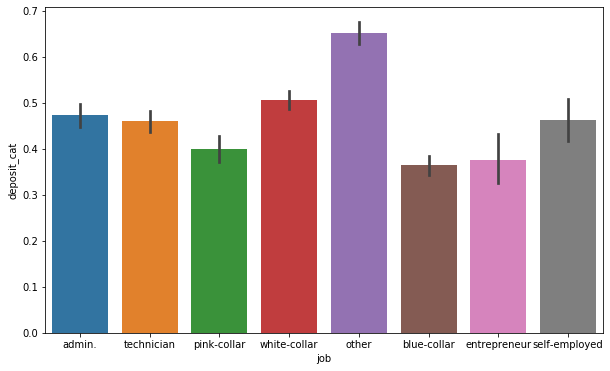

In [32]:
#Bar chart of Job Vs deposit
plt.figure(figsize=(10,6))
sns.barplot(x='job',y='deposit_cat', data= data)

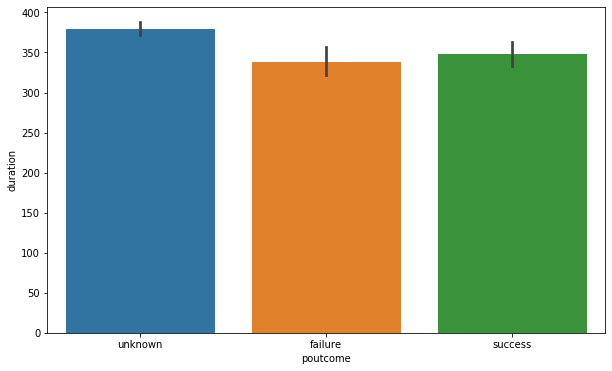

In [33]:
# Bar chart of "previous outcome" Vs "call duration"

plt.figure(figsize=(10,6))
sns.barplot(x='poutcome', y = 'duration', data = data)

Classification

In [35]:
#make a copy
data_cl = data_with_dummies

In [36]:
#The correlation matrix
corr = data_cl.corr()
corr

,age,balance,duration,campaign,pdays,previous,default_cat,housing_cat,loan_cat,deposit_cat,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
age,1.000000,0.112300,0.000189,-0.005278,-0.027589,0.020169,-0.011425,-0.168700,-0.031418,0.034901,...,0.186349,0.318436,-0.467799,0.231150,-0.094400,-0.101372,0.077761,-0.008071,0.062114,-0.038992
balance,0.112300,1.000000,0.022436,-0.013894,-0.046627,0.030805,-0.060954,-0.077092,-0.084589,0.081129,...,-0.017586,0.025431,-0.014994,-0.000673,-0.070609,0.069128,0.014596,0.001695,0.045603,-0.034524
duration,0.000189,0.022436,1.000000,-0.041557,0.043951,-0.026716,-0.009760,0.035051,-0.001914,0.451919,...,0.021364,-0.036179,0.023847,0.013405,0.003820,-0.006813,-0.015887,-0.033966,-0.022578,0.042725
campaign,-0.005278,-0.013894,-0.041557,1.000000,0.131490,-0.049699,0.030975,0.006660,0.034722,-0.128081,...,-0.006828,0.047722,-0.046165,0.019915,-0.013834,-0.005427,0.012976,-0.080188,-0.091807,0.128907
pdays,-0.027589,-0.046627,0.043951,0.131490,1.000000,-0.622197,0.053787,0.026349,0.059783,-0.231811,...,0.035538,0.013835,-0.039228,0.061388,0.013186,-0.056438,-0.004758,-0.599364,-0.561202,0.872474
previous,0.020169,0.030805,-0.026716,-0.049699,-0.622197,1.000000,-0.035273,-0.000840,-0.022668,0.139867,...,-0.026566,-0.005176,0.023817,-0.024852,-0.004620,0.028146,-0.011898,0.335870,0.325477,-0.496921
default_cat,-0.011425,-0.060954,-0.009760,0.030975,0.053787,-0.035273,1.000000,0.011076,0.076434,-0.040680,...,0.019633,-0.006819,-0.006255,0.013858,-0.000618,-0.011768,0.005421,-0.024650,-0.040272,0.048403
housing_cat,-0.168700,-0.077092,0.035051,0.006660,0.026349,-0.000840,0.011076,1.000000,0.076761,-0.203888,...,0.007430,0.036305,-0.043817,0.017002,0.118514,-0.114955,-0.053191,0.087741,-0.136299,0.031375
loan_cat,-0.031418,-0.084589,-0.001914,0.034722,0.059783,-0.022668,0.076434,0.076761,1.000000,-0.110580,...,0.026463,0.044148,-0.065288,0.006854,0.079583,-0.067513,-0.050249,0.006264,-0.080370,0.053686
deposit_cat,0.034901,0.081129,0.451919,-0.128081,-0.231811,0.139867,-0.040680,-0.203888,-0.110580,1.000000,...,0.005228,-0.092157,0.094632,-0.063002,-0.051952,0.094598,0.014355,0.020714,0.286642,-0.224785


Text(0.5, 1, 'Heatmap of correlation matrix')

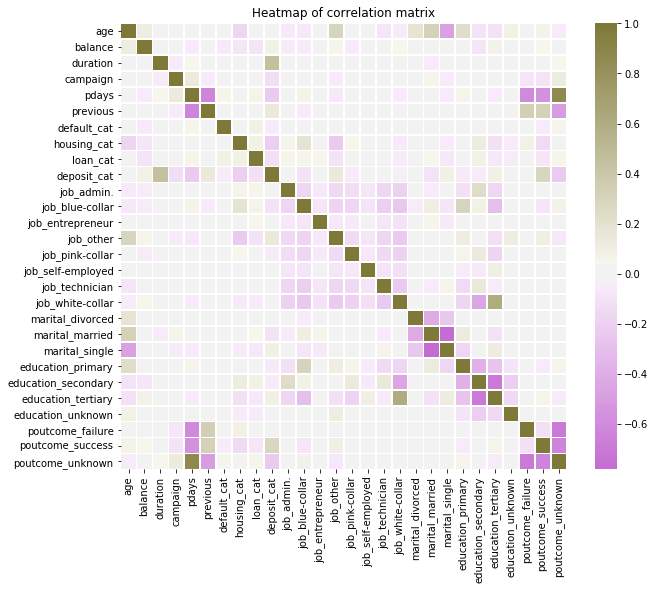

In [85]:
#Heatmap
plt.figure(figsize=(10,10))
cmap = sns.diverging_palette(300,80, as_cmap=True)
sns.heatmap(corr, xticklabels = corr.columns.values,
           yticklabels=corr.columns.values, cmap = cmap, vmax = 1,
           center = 0, square = True, linewidths=.8, cbar_kws={"shrink":.82})
plt.title("Heatmap of correlation matrix")

In [62]:
#Extract the deposit_cat column (the dependent variable)
corr_deposit = pd.DataFrame(corr['deposit_cat'].drop('deposit_cat'))
corr_deposit.sort_values(by = 'deposit_cat', ascending = False)

,deposit_cat
duration,0.451919
poutcome_success,0.286642
job_other,0.144408
previous,0.139867
marital_single,0.094632
education_tertiary,0.094598
balance,0.081129
job_white-collar,0.036301
age,0.034901
poutcome_failure,0.020714


# Build the data model

In [69]:
# Train-Test split: 20% test data
data_drop_deposit = data_cl.drop('deposit_cat', 1)
label = data_cl.deposit_cat
data_train, data_test, label_train, label_test = train_test_split(data_drop_deposit, label, test_size = 0.2, random_state = 50)

In [70]:
# Decision tree with depth = 2
dt2 = tree.DecisionTreeClassifier(random_state=1, max_depth=2)
dt2.fit(data_train, label_train)

dt2_score_train = dt2.score(data_train, label_train)
print("Training score: ",dt2_score_train)

dt2_score_test = dt2.score(data_test, label_test)
print("Testing score: ",dt2_score_test)

Training score:  0.7285250307985217
Testing score:  0.7268248992386923


In [71]:
#Decision Tree with Depth = 3
dt3 = tree.DecisionTreeClassifier(random_state=1, max_depth=3)
dt3.fit(data_train, label_train)

dt3_score_train = dt3.score(data_train, label_train)
print("Training score: ",dt3_score_train)

dt3_score_test = dt3.score(data_test, label_test)
print("Testing score: ",dt3_score_test)

Training score:  0.770411020271027
Testing score:  0.7572772055530677


In [72]:
# Decision tree with depth = 4
dt4 = tree.DecisionTreeClassifier(random_state=1, max_depth=4)
dt4.fit(data_train, label_train)

dt4_score_train = dt4.score(data_train, label_train)
print("Training score: ",dt4_score_train)

dt4_score_test = dt4.score(data_test, label_test)
print("Testing score: ",dt4_score_test)

Training score:  0.7885541494008288
Testing score:  0.774294670846395


In [74]:
# Decision tree with depth = 5
dt5 = tree.DecisionTreeClassifier(random_state=1, max_depth=5)
dt5.fit(data_train, label_train)
dt5_score_train = dt5.score(data_train, label_train)
print("Training score: ",dt5_score_train)
dt5_score_test = dt5.score(data_test, label_test)
print("Testing score: ",dt5_score_test)

Training score:  0.7976257139657297
Testing score:  0.7760859829825347


In [75]:
# Decision tree with depth = 6
dt6 = tree.DecisionTreeClassifier(random_state=1, max_depth=6)
dt6.fit(data_train, label_train)

dt6_score_train = dt6.score(data_train, label_train)
print("Training score: ",dt6_score_train)

dt6_score_test = dt6.score(data_test, label_test)
print("Testing score: ",dt6_score_test)

Training score:  0.8080412140217269
Testing score:  0.7792207792207793


In [76]:
#Decision Tree: TO full depth
dt1 = tree.DecisionTreeClassifier()
dt1.fit(data_train, label_train)

dt1_score_train = dt1.score(data_train, label_train)
print("Training score :", dt1_score_train)

dt1_score_test = dt1.score(data_test, label_test)
print("Testing score: ", dt1_score_test)

Training score : 1.0
Testing score:  0.735333631885356


Comparing Training and Testing scores for various tree depths used

In [79]:
print('{:10} {:20} {:20}'.format('depth','Training score','Testing score'))
print('{:10} {:20} {:20}'.format('-----', '--------------','-------------'))
print('{:1} {:>25} {:>20}'.format(2, dt2_score_train, dt2_score_test))
print('{:1} {:>25} {:>20}'.format(3, dt3_score_train, dt3_score_test))
print('{:1} {:>25} {:>20}'.format(4, dt4_score_train, dt4_score_test))
print('{:1} {:>25} {:>20}'.format(5, dt5_score_train, dt5_score_test))
print('{:1} {:>25} {:>20}'.format(6, dt6_score_train, dt6_score_test))
print('{:1} {:>23} {:>20}'.format("max", dt1_score_train, dt1_score_test))

depth      Training score       Testing score       
-----      --------------       -------------       
2        0.7285250307985217   0.7268248992386923
3         0.770411020271027   0.7572772055530677
4        0.7885541494008288    0.774294670846395
5        0.7976257139657297   0.7760859829825347
6        0.8080412140217269   0.7792207792207793
max                     1.0    0.735333631885356


In [89]:
#Let's generate the decision tree for depth = 2
#create a feature vector

features = data_cl.columns.tolist()


In [90]:
#Two classes:0 = not signed up, 1 = signed up
dt2.classes_

array([0, 1])

In [91]:
#create a feature vector
features = data_drop_deposit.columns.tolist()

features

['age',
 'balance',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'default_cat',
 'housing_cat',
 'loan_cat',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_other',
 'job_pink-collar',
 'job_self-employed',
 'job_technician',
 'job_white-collar',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'education_primary',
 'education_secondary',
 'education_tertiary',
 'education_unknown',
 'poutcome_failure',
 'poutcome_success',
 'poutcome_unknown']

In [95]:
#Investigate most important features with depth = 2

dt2 = tree.DecisionTreeClassifier(random_state=1, max_depth=2)

#Fit the decision tree classifier
dt2.fit(data_train, label_train)

fi = dt2.feature_importances_

l = len(features)
for i in range(0,l):
    print('{:.<20} {:3}'.format(features[i],fi[i]))

age................. 0.0
balance............. 0.0
duration............ 0.849306123902405
campaign............ 0.0
pdays............... 0.0
previous............ 0.0
default_cat......... 0.0
housing_cat......... 0.0
loan_cat............ 0.0
job_admin........... 0.0
job_blue-collar..... 0.0
job_entrepreneur.... 0.0
job_other........... 0.0
job_pink-collar..... 0.0
job_self-employed... 0.0
job_technician...... 0.0
job_white-collar.... 0.0
marital_divorced.... 0.0
marital_married..... 0.0
marital_single...... 0.0
education_primary... 0.0
education_secondary. 0.0
education_tertiary.. 0.0
education_unknown... 0.0
poutcome_failure.... 0.0
poutcome_success.... 0.15069387609759496
poutcome_unknown.... 0.0


Predicitons

In [97]:
# According to feature importance results, most importtant feature is the "Duration"
# Let's calculte statistics on Duration

print("Mean duration: ", data_drop_deposit.duration.mean())
print("Maximum duration: ", data_drop_deposit.duration.max())
print("minimum duration: ", data_drop_deposit.duration.min())

Mean duration:  371.99381831213043
Maximum duration:  3881
minimum duration:  2


In [101]:
# Get a row with poutcome_success = 1
#data_with_dummies[(bank_with_dummies.poutcome_success == 1)]
data_drop_deposit.iloc[985]

age                      46
balance                3354
duration                522
campaign                  1
pdays                   174
previous                  1
default_cat               0
housing_cat               1
loan_cat                  0
job_admin.                0
job_blue-collar           0
job_entrepreneur          0
job_other                 1
job_pink-collar           0
job_self-employed         0
job_technician            0
job_white-collar          0
marital_divorced          1
marital_married           0
marital_single            0
education_primary         0
education_secondary       1
education_tertiary        0
education_unknown         0
poutcome_failure          0
poutcome_success          1
poutcome_unknown          0
Name: 985, dtype: int64

In [103]:
#make prediction in the test set

preds = dt2.predict(data_test)

#calculate accuracy
print("\nAccuracy score: \n{}".format(metrics.accuracy_score(label_test,preds)))

#make preidiction on the test set using predict_proba
probs = dt2.predict_proba(data_test)[:,1]

#calculate the AUC metric
print("\nArea Under Curve: \n{}".format(metrics.roc_auc_score(label_test,probs)))


Accuracy score: 
0.7268248992386923

Area Under Curve: 
0.7880265888143609
